O governo do canadá pediu a ajuda para nossa consultoria Sirius contruir uma IA que consiga fazer a predição da emissão de CO2 na atmosfera considerando algumas características dos carros. Portanto, com a construção dessa IA o governo conseguirá focar em questões relacionadas a melhoria da qualidade do ar.
Para a resolução deste exercício você precisará responder várias questões.



Aqui uma breve descrição de todas as variáveis disponíveis no dataset:

**Variáveis**
Tota de variáveis: 12

Lingua: Inglês

`Make:`	        Empresa que fez o veículo

`Model:`	        Modelo do carro. (4WD/4X4 = Tração nas quatro rodas, AWD = Tração nas quatro rodas, FFV = Veículo de combustível flexível, SWB = Distância entre eixos curta, LWB = Distância entre eixos longa, EWB = Distância entre eixos estendida)

`Vehicle Class: `  Classe do veiculo, dependendo da utilidade, capacidade e peso

`Engine Size(L):`  Tamanho do motor usado em litros.

`Cylinders:`      Número de cilindros

`Transmission:`   Tipo de transmissão com número de engrenagens. (A = Automático, AM = Manual automatizado, AS = Automático com mudança de seleção, AV = Variável continuamente, M = Manual e valores de 3 - 10 = Número das engrenagens.)

`Fuel Type:`           Tipo de combustível usado. (X = Gasolina normal, Z = Gasolina premium, D = Diesel, E = Etanol (E85), N = Gás natural)

`Fuel Consumption City (L/100 km):`           Consumo de combustível nas estradas da cidade (L / 100 km)

`Fuel Consumption Hwy (L/100 km):`            Consumo de combustível em rodovias (L / 100 km)

`Fuel Consumption Comb (L/100 km):`         O consumo de combustível combinado (55% cidade, 45% rodovia) é mostrado em L / 100 km

`Fuel Consumption Comb (mpg):`       O consumo de combustível combinado na cidade e na rodovia é mostrado em milhas por galão (mpg)

`CO2 Emissions(g/km): `    As emissões de dióxido de carbono do tubo de escape (em gramas por quilômetro) para condução combinada em cidade e rodovia


Ao longo desse exercícios vamos tentar responder a perguntas como:

1.   Quais variáveis mais impactam na emissão de CO2?
2.   Considerando os principais algoritmos de regressão, quais apresentam melhor resultado das métricas R2 e MSE?
O que você poderia fazer para melhorar os valores das métricas do melhor
1.   O que você poderia fazer para melhorar os valores das métricas do melhor algoritmo?

In [151]:
#Questão 1
#Faça as importações necessárias
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt

# bibliotecas para os modelos
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# bibliotecas de métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [152]:
#Questão 2
#carregue os dados do arquivo csv
pd.set_option('display.max_columns', None)
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/ArquivosColab/CO2_Emissions_Canada.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
#Questão 3
#verifique as informações (info) do dataset e o seu formato (shape) e a sua descrição
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [154]:
df.shape

(7385, 12)

In [155]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


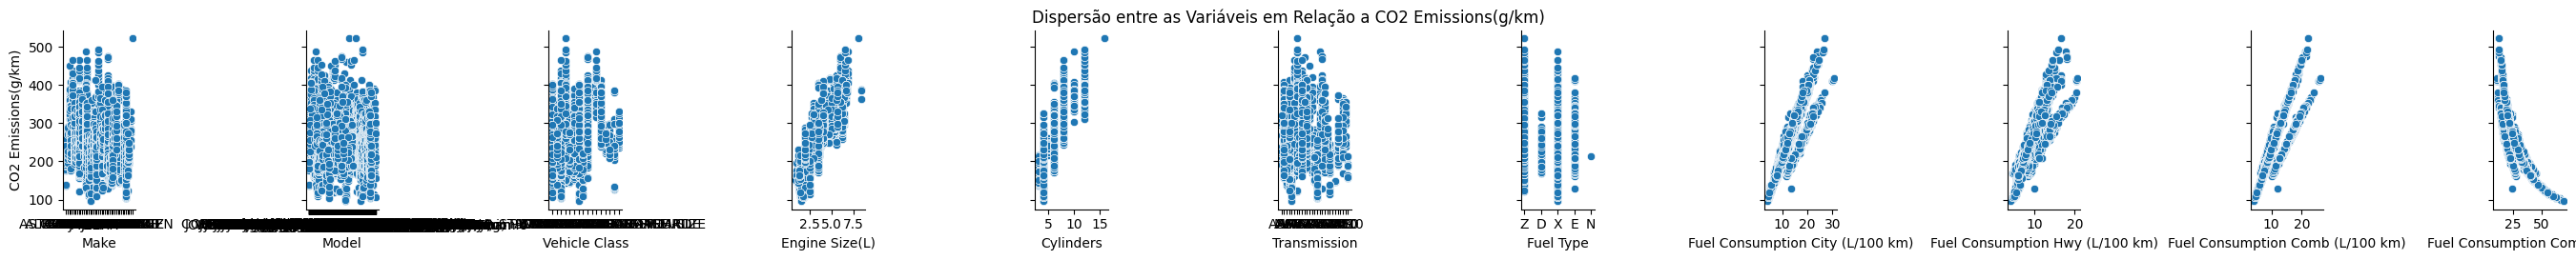

In [156]:
#Questão 4
# Visualizando a disperção das variáveis em relação a emissão de CO2
#dica: use o pairplot para plotar todas de uma vez
#ax = sns.pairplot
#ax.fig.suptitle('Disperção entre as variaveis',y=1.05)

# Crie o pairplot
ax = sns.pairplot(df, y_vars=['CO2 Emissions(g/km)'], x_vars=df.columns[:-1], diag_kind='kde')

# Defina o título do pairplot
ax.fig.suptitle('Dispersão entre as Variáveis em Relação a CO2 Emissions(g/km)', y=1.05)

# Exiba o pairplot
plt.show()

<Axes: xlabel='CO2 Emissions(g/km)'>

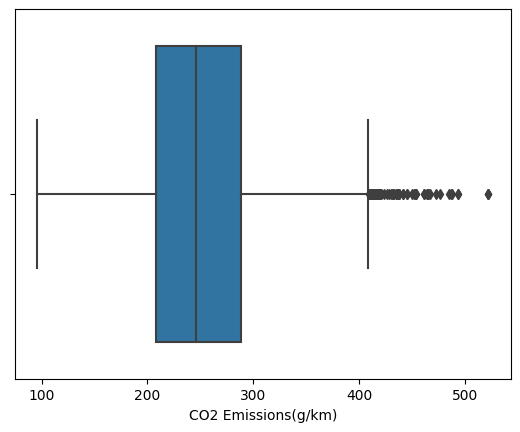

In [157]:
#Questão 5
#Visualizando a distribuição da emissão de CO2
#dica: que tal usar um boxplot aqui?
sns.boxplot(x='CO2 Emissions(g/km)', data=df)

<ipython-input-158-cd17a361efa3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


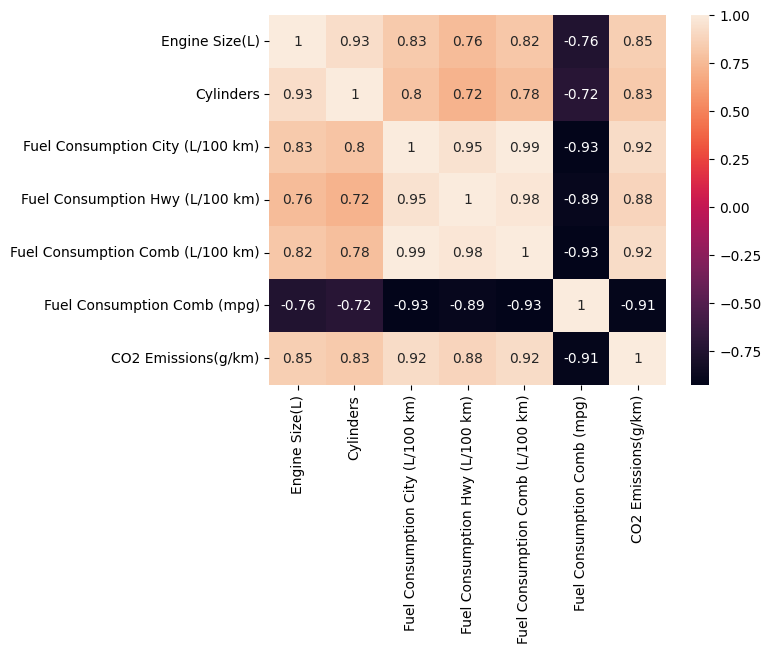

In [158]:
#Questão 6
#visualize a correlação entre as variáveis
#dica: será que um heatmap pode ajudar a gente aqui?
sns.heatmap(df.corr(), annot=True);

# ONE HOT ENCODING

In [159]:
#Questão 7
#Transforme as variáveis categóricas em númericas usando o Pandas ou sckitlearn
#após a transformação, garanta que os novos valores estão no dataset (talvez você precise usar `copy` `concat` )
#não se esqueça de apagar as variáveis antigas `drop`
#você aqui pode querer rodar tudo duas vezes! Uma vez SEM as variáveis categóricas (apenas as remova do dataset) e a segunda vez transformando as variáveis categóricas
#qual versão irá se sair melhor? Porque você acha isso?

df_aux = pd.get_dummies(df['Make'], prefix='Make')
df = pd.concat([df, df_aux], axis=1)
df.drop(['Make'], axis=1, inplace=True)

df_aux = pd.get_dummies(df['Model'], prefix='Model')
df = pd.concat([df, df_aux], axis=1)
df.drop(['Model'], axis=1, inplace=True)

df_aux = pd.get_dummies(df['Vehicle Class'], prefix='Vehicle Class')
df = pd.concat([df, df_aux], axis=1)
df.drop(['Vehicle Class'], axis=1, inplace=True)

df_aux = pd.get_dummies(df['Transmission'], prefix='Transmission')
df = pd.concat([df, df_aux], axis=1)
df.drop(['Transmission'], axis=1, inplace=True)

df_aux = pd.get_dummies(df['Fuel Type'], prefix='Fuel Type')
df = pd.concat([df, df_aux], axis=1)
df.drop(['Fuel Type'], axis=1, inplace=True)

In [160]:
#Questão 8
#Defina X e y e separa 20% dos dados para test
# separando dados de treino e teste
# criando X e y
#MODELO 1 SEM O ONE HOT ENCODING
X = df.drop('CO2 Emissions(g/km)', axis=1)
y = df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Funções

In [161]:
#Questão 9
#Antes de começarmos a treinar nossos modelos, que tal criar uma funcão que recebe 2 parâmetros: o valor previsto pelo modelo e o resultado real.
#Com base nesse 2 valores, a funcão calcula e imprime o R2, MSE e MAE

def metricas(valor_previsto, resultado_real):
    # Calcula o R²
    r2 = r2_score(resultado_real, valor_previsto)
    print("R²:", r2)

    # Calcula o MSE
    mse = mean_squared_error(resultado_real, valor_previsto)
    print("MSE:", mse)

    # Calcula o MAE
    mae = mean_absolute_error(resultado_real, valor_previsto)
    print("MAE:", mae)

In [162]:
#Quais variáveis tem mais importância pro nosso modelo?
#vamos usar o código abaixo para criar uma função que exiba as 10 variáveis que tem mais peso na predição do modelo
#Você consegue entender o que essa função está fazendo?
def feature_importance(modelo):
    importances = pd.Series(data=modelo.feature_importances_, index=df.drop(columns=['CO2 Emissions(g/km)']).columns)
    importances.sort_values(ascending=False, inplace=True) #ordenando as variáveis
    sns.barplot(x=importances[:10], y=importances.index[:10], orient='h').set_title('Importância de cada feature')

# Modelos

In [ ]:
#Escolha um modelo de regressão de sua preferência mais o Decision Tree, Random Forest e o XGBoost para treinar e testar.
#Para os 3 últimos (DT, RF e  XGB) calcule quais as features mais importantes usando a função que acabamos de criar
#Para cada um deles responda:
#1- Como foram as métricas de avaliação do modelo?
#2- Para os 3 últimos, responda: Quais features foram as mais importantes para o modelo?

In [163]:
#Questão 10 - Modelo 1 - KNN
# criando modelo KNN Regressor
modeloKNN = KNeighborsRegressor(n_neighbors=5) # considerando 5 neighbors
# fazendo o fit/ajustando o modelo com os dados de treinamento
modeloKNN.fit(X_train, y_train)
# predicoes do modelo
predicaoKNN = modeloKNN.predict(X_test)

In [164]:
#Questão 11 - Modelo 2 - Decision Tree
# criando modelo
modeloDT = DecisionTreeRegressor()
# fazendo o fit/ajustando o modelo com os dados de treinamento
modeloDT.fit(X_train, y_train)
# predicoes do modelo
predicaoDT = modeloDT.predict(X_test)

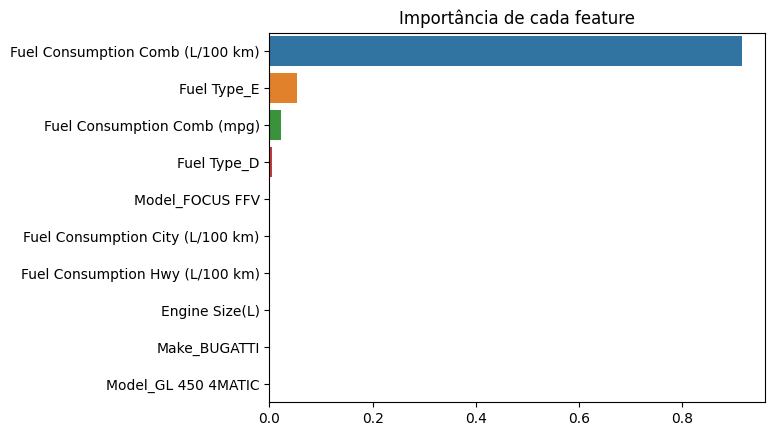

In [165]:
# verificando as varáveis mais importante para o Decision Tree
feature_importance(modeloDT)

* **Comentário:** As variáveis mais importante para o Decision Tree é Fuel Consumption comb (L/100 LM), Fuel Type_E e Fuel Consumption Comb (mpg).

In [166]:
#Questão 12 - Modelo 3 - Random Forest
# criando modelo Random Forest
modeloRF = RandomForestRegressor(n_estimators=100, min_samples_leaf=2)
# fazendo o fit/ajustando o modelo com os dados de treinamento
modeloRF.fit(X_train, y_train)
# predicoes do modelo
predicaoRF = modeloRF.predict(X_test)

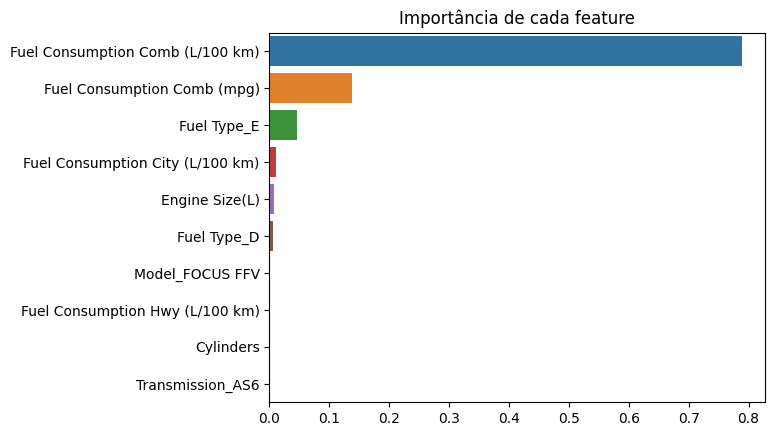

In [167]:
# verificando as varáveis mais importante para o Random Forest
feature_importance(modeloRF)

* **Comentário:** As variáveis mais importante para o Random Forest é Fuel Consumption comb (L/100 km),Fuel Consumption Comb (mpg), Fuel Type_E e Fuel Consumption City (L/100 km).

In [168]:
#Questão 13 - XGBoost
# criando modelo de Regressão XGBoost
modeloXGB = XGBRegressor()
# fazendo o fit/ajustando o modelo com os dados de treinamento
modeloXGB.fit(X_train, y_train)
# predicoes do modelo
predicaoXGB = modeloXGB.predict(X_test)

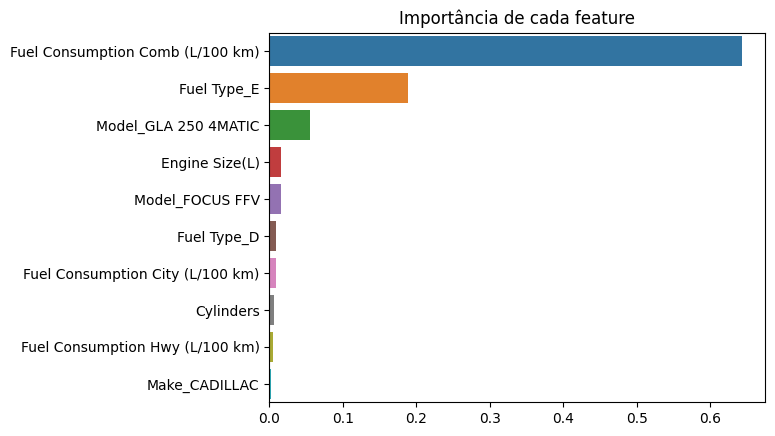

In [169]:
# verificando as varáveis mais importante para o XGBoost
feature_importance(modeloXGB)

* **Comentário:** As variáveis mais importante para o XGBoost é Fuel Consumption comb (L/100 km), Fuel Type_E e Fuel Consumption City (L/100 km), Cylinders,  Fuel Consumption HWY (L/100 km).

# Métricas

In [170]:
# verificando metricas do KNN
metricas(predicaoKNN, y_test)

R²: 0.9908454681435429
MSE: 31.488178740690586
MAE: 3.3750846310088014


In [171]:
# verificando metricas do Decision Tree
metricas(predicaoDT, y_test)

R²: 0.9950679429025665
MSE: 16.96443880237719
MAE: 1.8705484089370346


In [172]:
# verificando metricas do Random Forest
metricas(predicaoRF, y_test)

R²: 0.9962891836858256
MSE: 12.763825524532527
MAE: 1.8952811178327442


In [173]:
# verificando metricas do XGBoost
metricas(predicaoXGB, y_test)

R²: 0.9949442425463857
MSE: 17.389921938684108
MAE: 2.3226477662372527


In [174]:
#Questão 14
#Você consegue alterar os parâmetros do XGBoost para que ele alcance um resultado melhor?

# criando modelo de Regressão XGBoost
modeloXGB = XGBRegressor(max_depth=3, learning_rate = 0.1,n_estimators=100)
# fazendo o fit/ajustando o modelo com os dados de treinamento
modeloXGB.fit(X_train, y_train)
# predicoes do modelo
predicaoXGB = modeloXGB.predict(X_test)

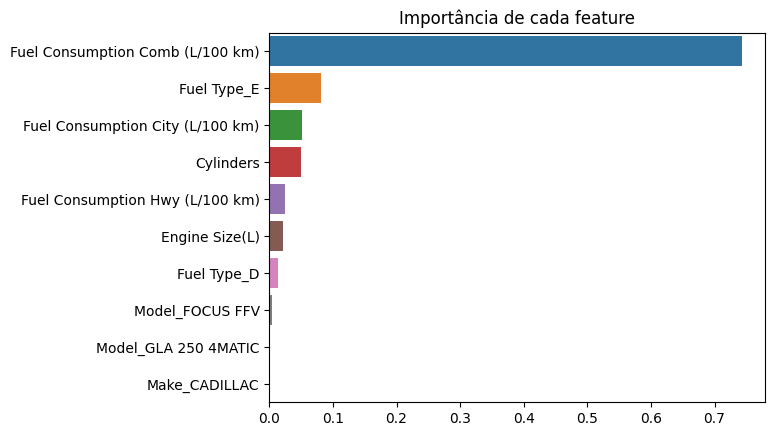

In [175]:
# verificando as varáveis mais importante para o XGBoost
feature_importance(modeloXGB)

In [176]:
# verificando metricas do XGBoost com novos parâmetros
metricas(predicaoXGB, y_test)

R²: 0.9955767390333644
MSE: 15.214369682475882
MAE: 2.5628114983126693


* **Comentário:** Com as mudanças de parâmetros o modelo melhorou consideralmente no R2 e MSE, mas piorou um pouco no MAE.